Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('Company_Data.csv')
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [13]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [18]:
df['ShelveLoc'].value_counts()
df['Urban'].value_counts()
df['US'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [20]:

from sklearn.preprocessing import OneHotEncoder

# Ordinal encoding mapping for 'ShelveLoc'
shelveloc_mapping = {'Bad': 0, 'Medium': 1, 'Good': 2}

# Apply ordinal encoding to 'ShelveLoc' column
df['ShelveLoc_Encoded'] = df['ShelveLoc'].map(shelveloc_mapping)

# Drop the original 'ShelveLoc' column
df.drop('ShelveLoc', axis=1, inplace=True)

# Categorical columns for one-hot encoding
categorical_columns = ['Urban', 'US']

# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_features = one_hot_encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame with the encoded features
encoded_df = pd.concat([df.drop(categorical_columns, axis=1), pd.DataFrame(encoded_features)], axis=1)

encoded_df


Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Encoded    0    1    2    3  
0                    0  0.0  1.0  0.0  1.0  
1                    2  0.0  1.0  0.0  1.0  
2                    1  0.0  1.0  0.0  1.0  
3                    1  0.0  1.0  0.0  1.0  
4                    0  0.0  1.0  1.0  0.0  
..                 ...  ...  ...  ...  ...  
395                  2  0.0  1.0  0.0  1.0  
396                  1  1.0  0.0  0.0  1.0  
397                  1  0.0  1.0  0.0  1.0  
398                  0  0.0  1.0  0.0  1.0  
399                  2  0.0  1.0  0.0  1.0  

[400 rows x 13 columns]

In [22]:
sns.heatmap(encoded_df.corr(),annot=True)



<AxesSubplot:>

# Model building¶

In [23]:
x = encoded_df.iloc[:,1:]
y = encoded_df['Sales']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [24]:
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.61073580977689
MSE: 3.229509820499998
RMSE: 1.7970836988020336


In [25]:
len(rf.estimators_)

100

In [26]:
rf.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=1969231583)

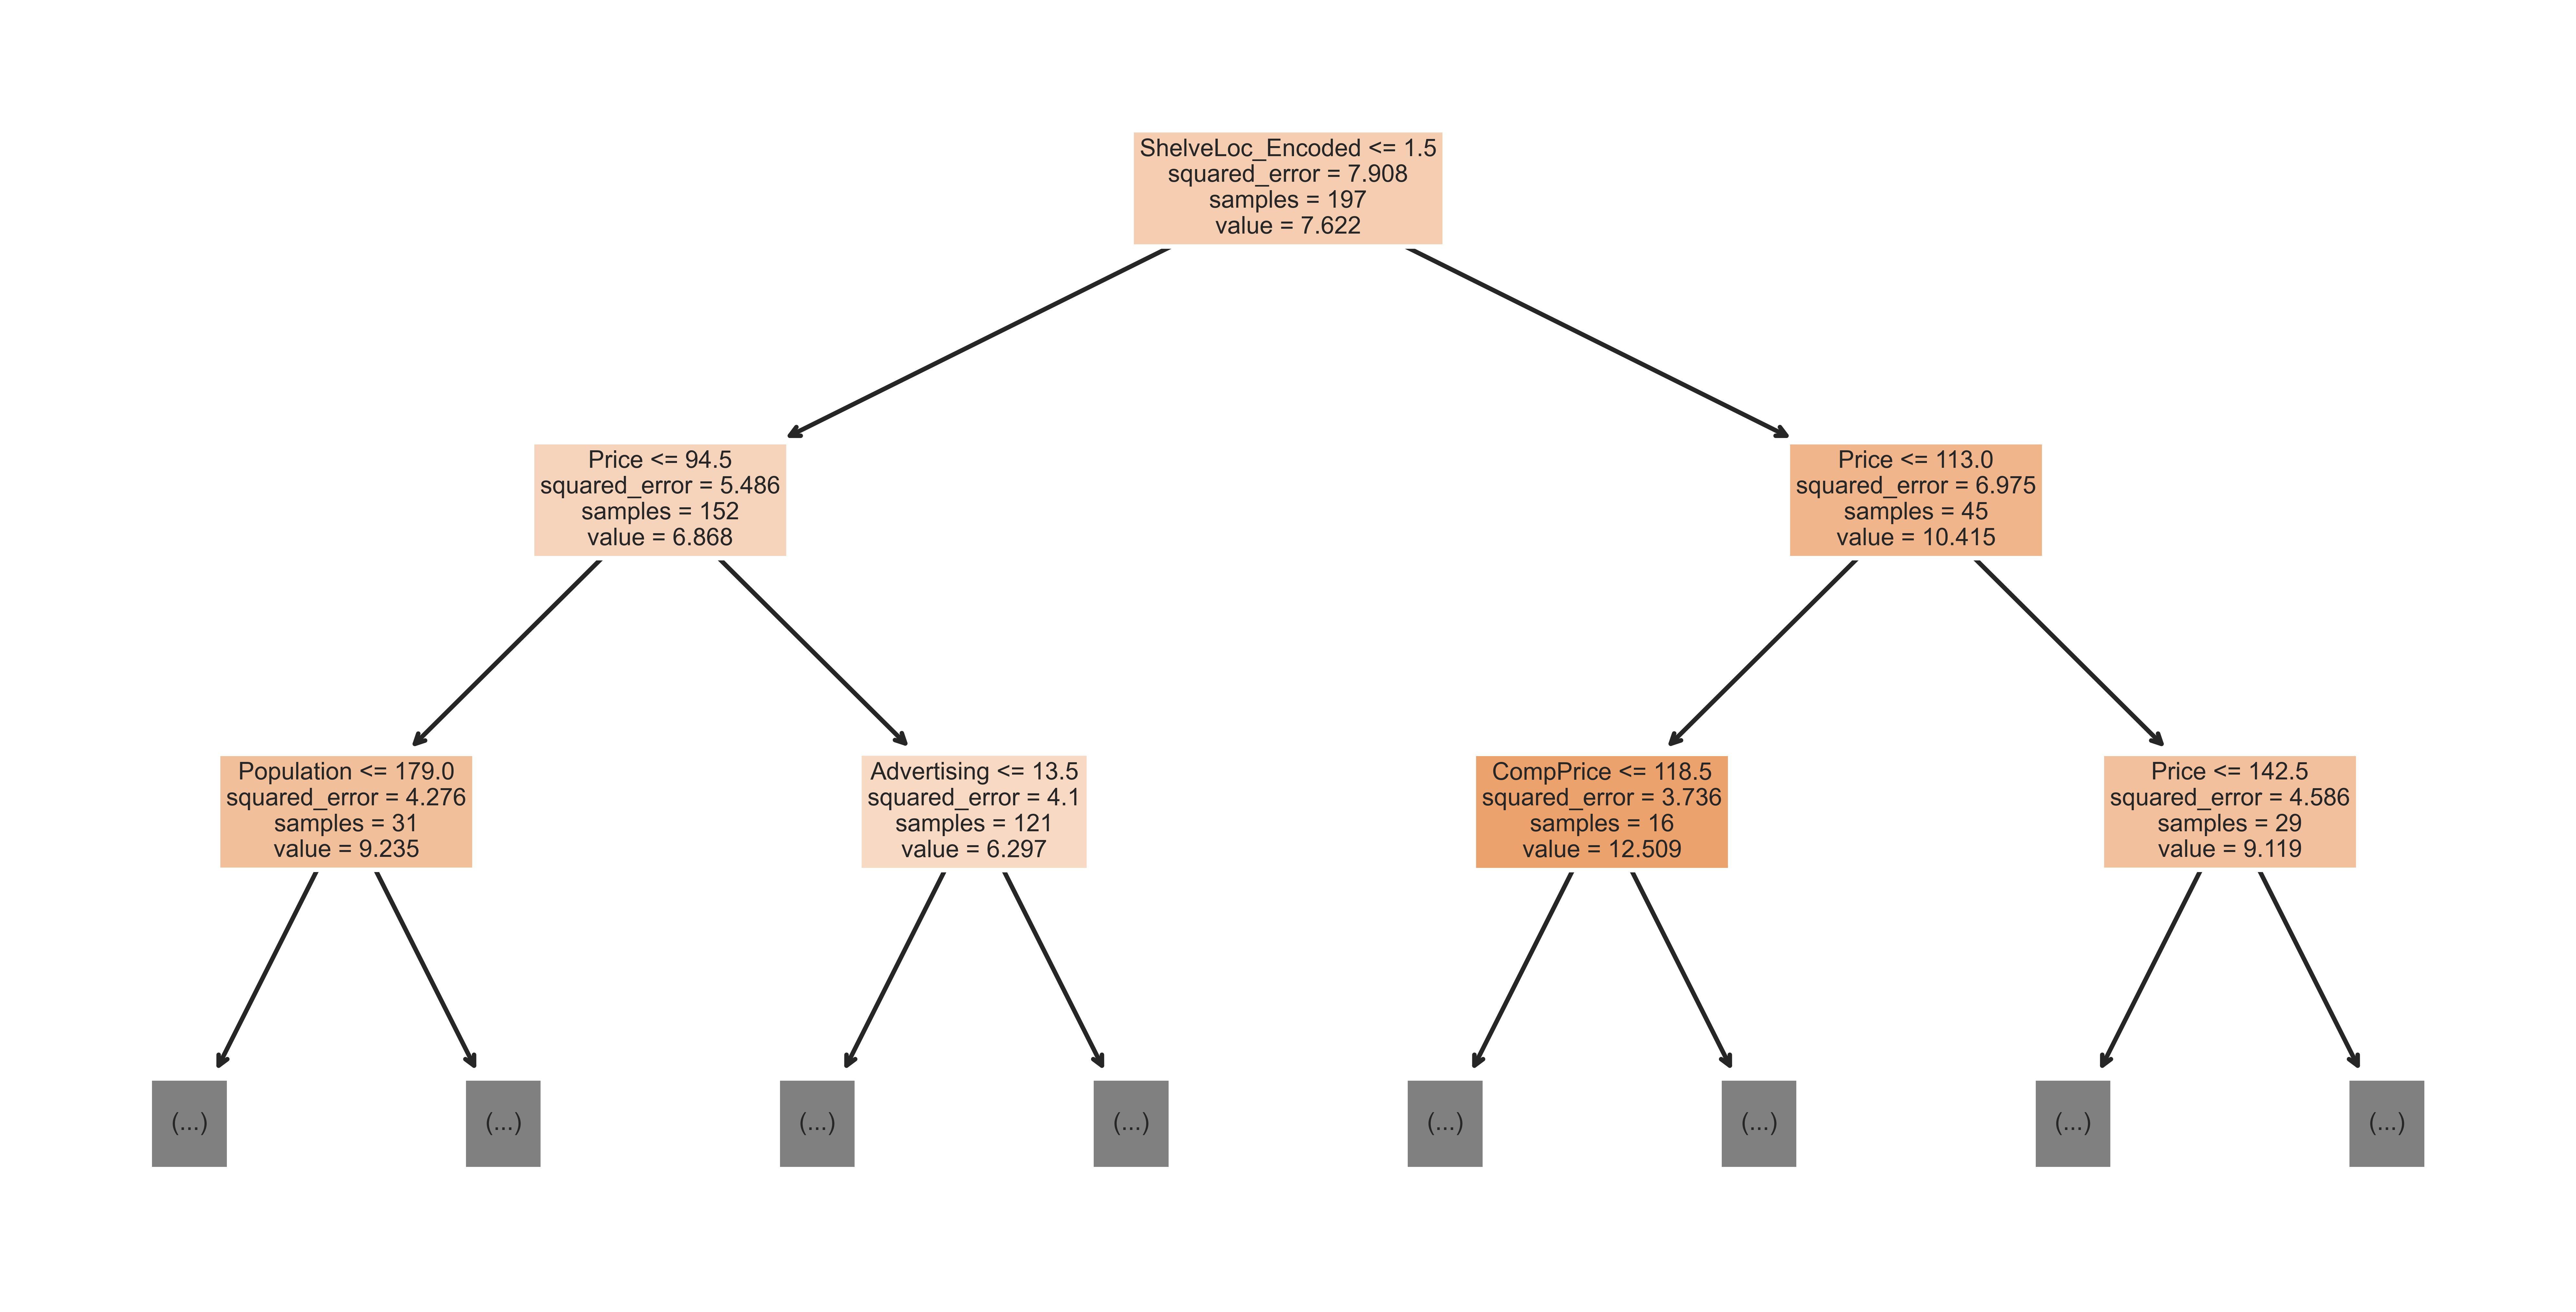

In [27]:
tree.plot_tree(rf.estimators_[0], feature_names=x.columns,
              filled=True, max_depth=2)
plt.show()

# Feature Importance Analysis

In [ ]:
After training the random forest Regressor, we extract the feature importances using the feature_importances_ attribute of the trained model. These importances are then used to create a DataFrame importance_df that contains the feature names and their corresponding importances.

The importance_df DataFrame is sorted in descending order based on the importances. Then, a bar plot is created using matplotlib to visualize the feature importances.

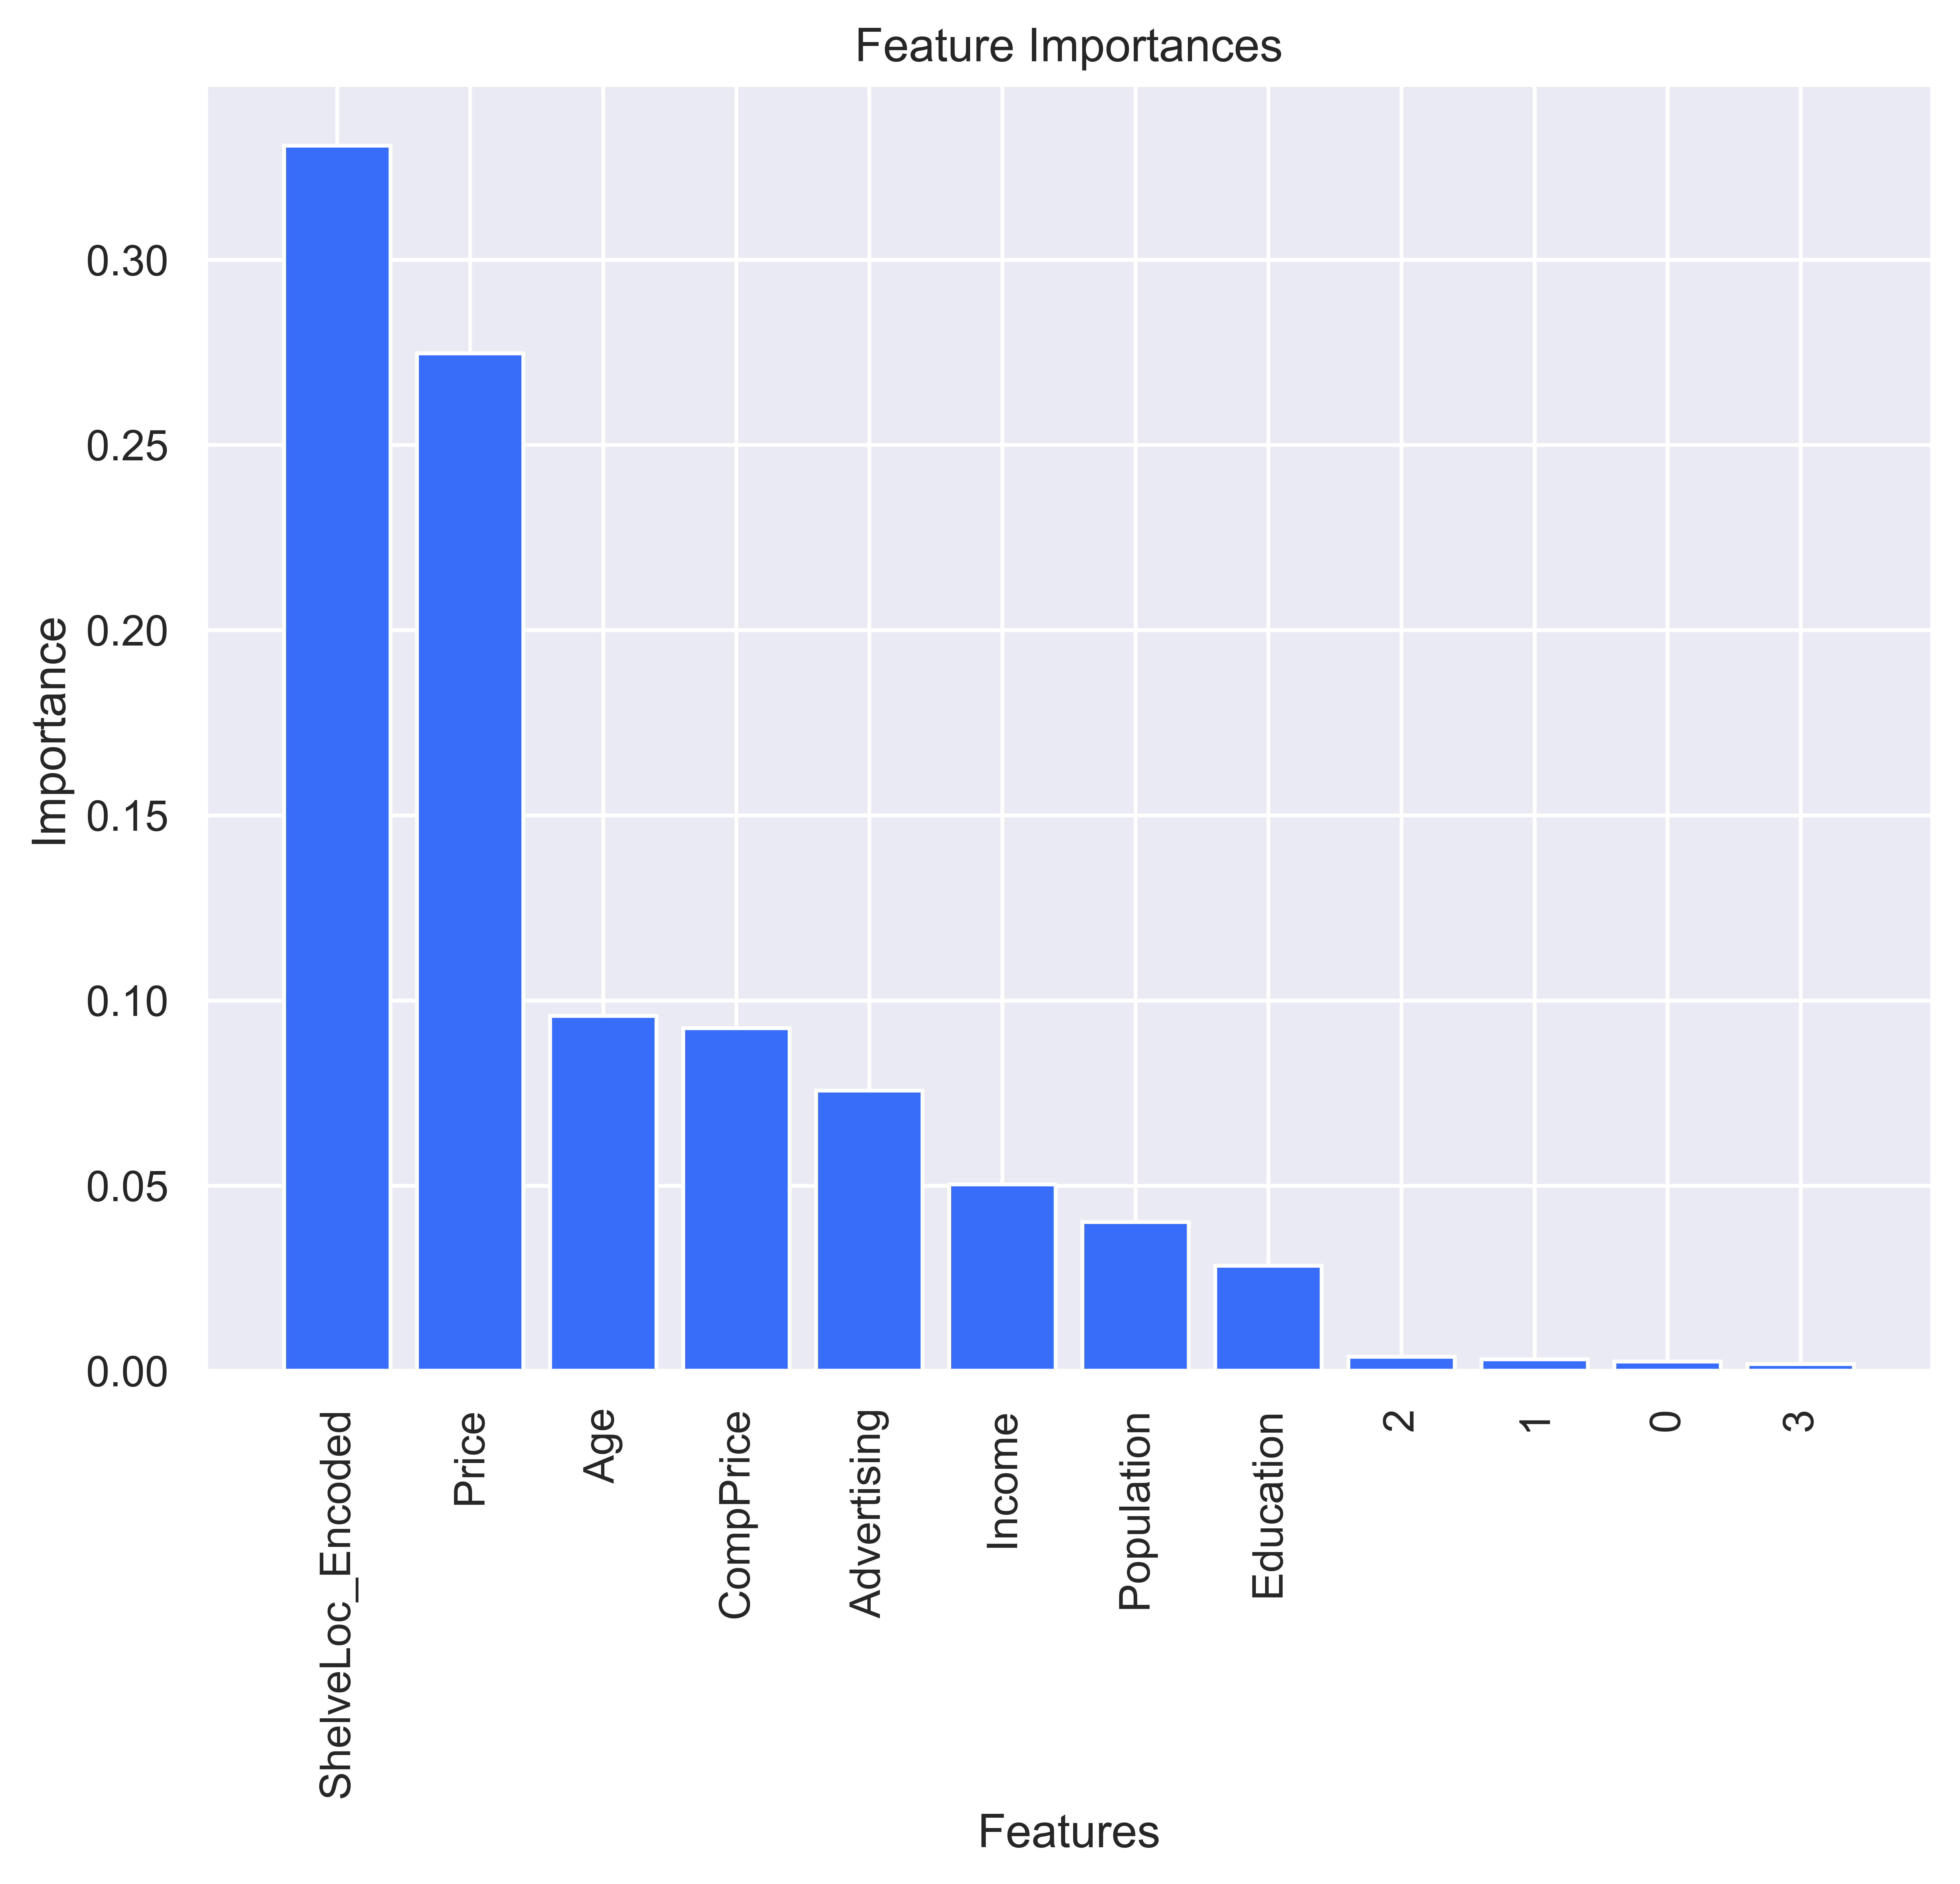

Feature  Importance
7   ShelveLoc_Encoded    0.330890
4               Price    0.274793
5                 Age    0.095855
0           CompPrice    0.092568
2         Advertising    0.075668
1              Income    0.050374
3          Population    0.040173
6           Education    0.028373
10                  2    0.003835
9                   1    0.003132
8                   0    0.002492
11                  3    0.001848

In [42]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

importance_df['Feature'] = importance_df['Feature'].astype(str)


# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
importance_df



        So as per the above Solution the most important feature is the Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site.Next is the PriceTHEN AGE THEN comprice etc as shown in above dataframe and the bargraph 